<a href="https://colab.research.google.com/github/izabellapoliv/alura-estatistica-parte1/blob/main/exercicio_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
35293,31,1,55,2,4,250,1.757318
35294,31,0,46,8,5,788,1.840207
35295,31,1,32,8,4,788,1.669823
35296,31,0,47,2,12,788,1.678761


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
renda_min = dados.Renda.min()
renda_min

0

In [ ]:
renda_max = dados.Renda.max()
renda_max

200000

In [ ]:
salario_minimo = 788
classes = [renda_min, 2*salario_minimo, 5*salario_minimo, 15*salario_minimo, 25*salario_minimo, renda_max]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [ ]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [ ]:
categorizacao = pd.cut(x = dados.Renda, bins=classes, labels=labels, include_lowest=True)
categorizacao

0        E
1        E
2        E
3        D
4        E
        ..
35293    E
35294    E
35295    E
35296    E
35297    E
Name: Renda, Length: 35298, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [ ]:
frequencia = categorizacao.value_counts()
frequencia

E    27040
D     5755
C     2215
B      189
A       99
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [ ]:
percentual = categorizacao.value_counts(normalize=True) * 100
percentual

E    76.604907
D    16.304040
C     6.275143
B     0.535441
A     0.280469
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
dist_freq_quantitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem {%}': percentual})
dist_freq_quantitativas.sort_index(ascending=False)

,Frequência,Porcentagem {%}
A,99,0.280469
B,189,0.535441
C,2215,6.275143
D,5755,16.304040
E,27040,76.604907


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

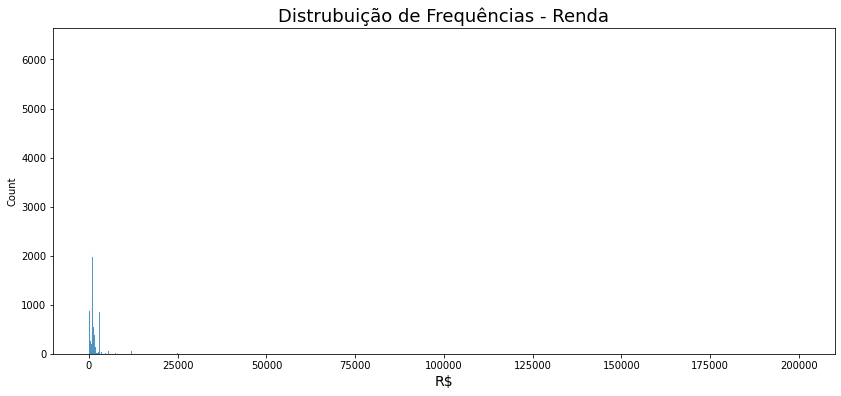

In [ ]:
ax = sns.histplot(data=dados.Renda)
ax.figure.set_size_inches(14,6)
ax.set_title('Distrubuição de Frequências - Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

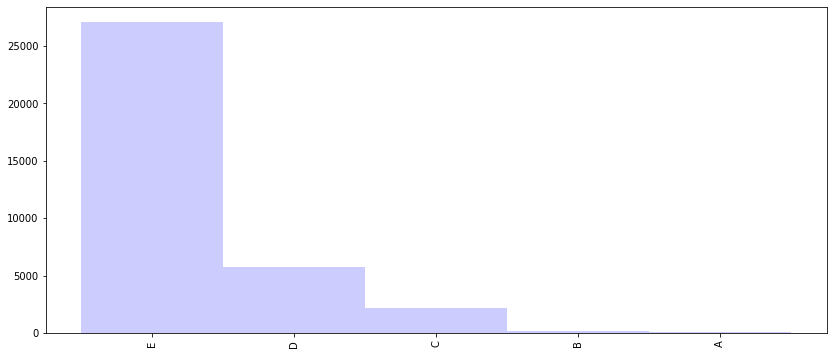

In [ ]:
dist_freq_quantitativas['Frequência'].plot.bar(width=1, color='blue', alpha=0.2, figsize=(14, 6))

> ### Conclusões

A grande maioria das pessoas na pesquisa estão na classe E, seguido da classe D. A quantidade de pessoas cai conforme aumenta a classe social.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

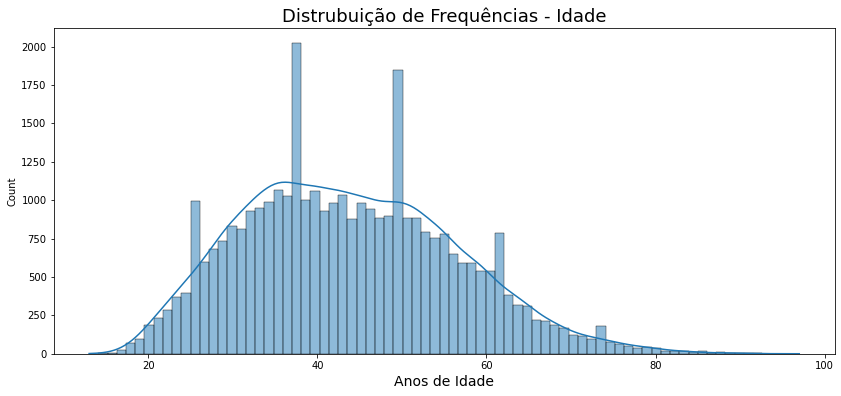

In [ ]:
# Idade, Anos de Estudo, Renda, Altura
ax = sns.histplot(data=dados.Idade, kde=True)
ax.figure.set_size_inches(14,6)
ax.set_title('Distrubuição de Frequências - Idade', fontsize=18)
ax.set_xlabel('Anos de Idade', fontsize=14)
ax

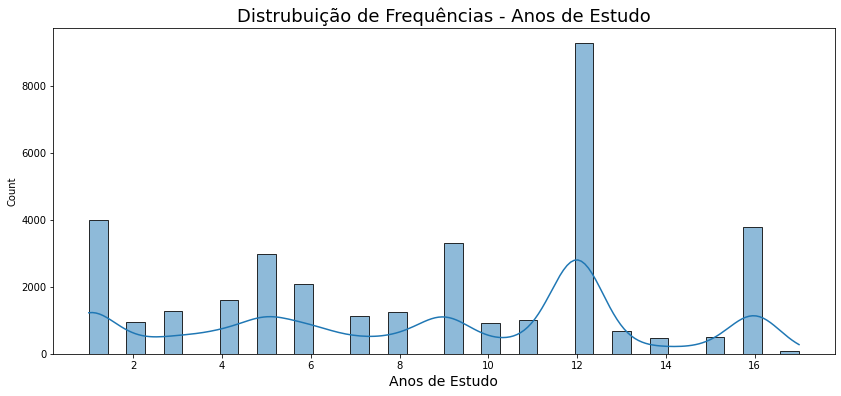

In [ ]:
# Idade, Anos de Estudo, Renda, Altura
ax = sns.histplot(data=dados['Anos de Estudo'], kde=True)
ax.figure.set_size_inches(14,6)
ax.set_title('Distrubuição de Frequências - Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos de Estudo', fontsize=14)
ax

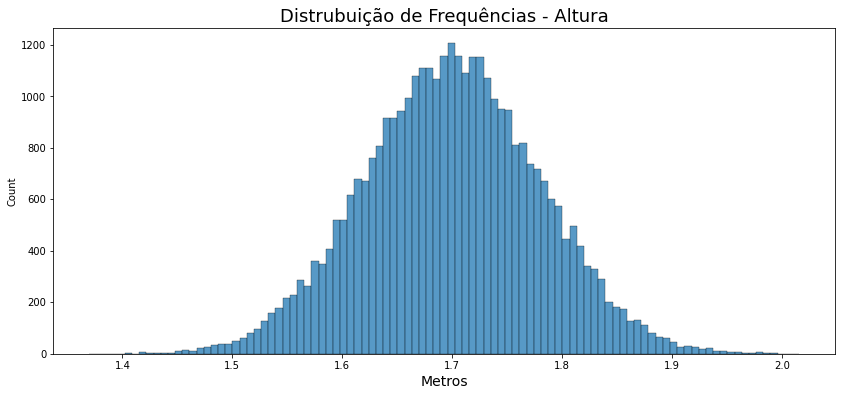

In [ ]:
# Idade, Anos de Estudo, Renda, Altura
ax = sns.histplot(data=dados.Altura)
ax.figure.set_size_inches(14,6)
ax.set_title('Distrubuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

> ### Conclusões

Altura = simétrica, Anos de Estudo = não possui simetria, Idade = assimétrica à direita. A maioria dos chefes de família são adultos de meia idade, o tempo de estudo varia muito entre eles.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

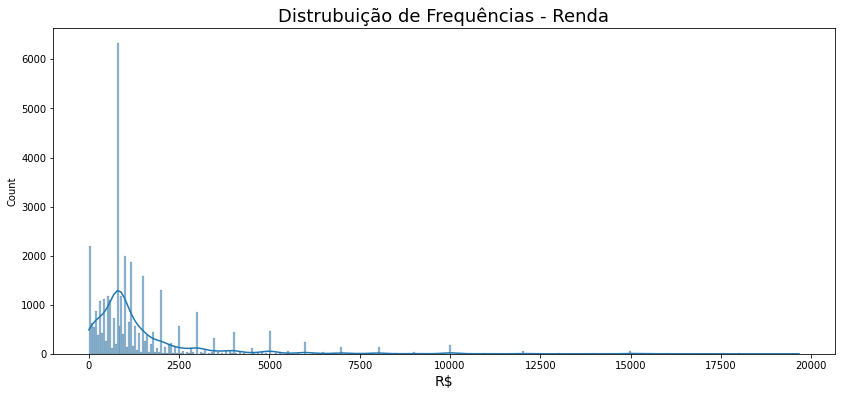

In [ ]:
ax = sns.histplot(data=dados.query('Renda < 20000').Renda, kde=True)
ax.figure.set_size_inches(14,6)
ax.set_title('Distrubuição de Frequências - Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index = sexo, columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,187,6039,3008,41,15101
Feminino,61,2602,1566,38,6655


In [ ]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize = True) * 100
percentual.rename(index = sexo, columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.529775,17.108618,8.521729,0.116154,42.781461
Feminino,0.172814,7.371522,4.436512,0.107655,18.853759


In [ ]:
percentual_uf_estudo = pd.crosstab(dados.UF, dados.Cor, normalize = True) * 100
percentual_uf_estudo.rename(index = uf, columns = cor, inplace = True)
percentual_uf_estudo

Cor,Indígena,Branca,Preta,Amarela,Parda
UF,,,,,
Rondônia,0.008499,1.393847,0.467449,0.025497,2.459063
Acre,0.076492,0.538274,0.260638,0.005666,1.773472
Amazonas,0.164315,0.971726,0.348462,0.016998,4.748144
Roraima,0.056660,0.271970,0.172814,0.002833,1.025554
Pará,0.124653,2.238087,1.320188,0.039662,8.881523
Amapá,0.002833,0.294634,0.141651,0.008499,1.002890
Tocantins,0.000000,0.883903,0.464616,0.011332,2.340076
Maranhão,0.025497,0.971726,0.762083,0.002833,3.300470
Piauí,0.002833,0.660094,0.427786,0.000000,2.340076


> ### Conclusões

A maioria dos chefes de família se identificam sendo da cor Parda.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
dados.Renda.mean()

1486.3392543486882

### Obtenha a mediana

In [ ]:
dados.Renda.median()

860.0

### Obtenha a moda

In [ ]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [ ]:
dados.Renda.mad()

1150.8806394121598

### Obtenha a variância

In [ ]:
dados.Renda.var()

6563287.24703021

### Obtenha o desvio-padrão

In [ ]:
dados.Renda.std()

2561.8913417688523

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
mean_renda = pd.crosstab(dados.Sexo, dados.Cor, aggfunc={'mean', 'median', 'max'}, values=dados.Renda)
mean_renda.rename(index = sexo, columns = cor, inplace = True)
mean_renda

max                                              mean  \
Cor       Indígena    Branca    Preta  Amarela     Parda    Indígena   
Sexo                                                                   
Masculino  10000.0  200000.0  50000.0  50000.0  100000.0  891.529412   
Feminino    5500.0   30000.0  18000.0   8000.0   30000.0  825.098361   

                                                                median  \
Cor             Branca        Preta      Amarela        Parda Indígena   
Sexo                                                                     
Masculino  2246.350058  1337.413231  4303.951220  1410.447719    788.0   
Feminino   1764.718294   966.537676  1327.052632  1055.995943    788.0   

                                         
Cor        Branca  Preta Amarela  Parda  
Sexo                                     
Masculino  1200.0  980.0  1400.0  900.0  
Feminino    850.0  788.0   925.0  788.0

> ### Conclusões

Para todas as cores, a pessoa com salário mais alto no dataframe é sempre do sexo masculino. Em média, os homens ganham mais do que as mulheres, mas a diferença mais acentuada está na cor Amarela, e a menos acentuada está na cor Indígena (mais igualitária).

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
mean_renda = pd.crosstab(dados.Sexo, dados.Cor, aggfunc={'mad', 'var', 'std'}, values=dados.Renda)
mean_renda.rename(index = sexo, columns = cor, inplace = True)
mean_renda

mad                                                     \
Cor          Indígena       Branca       Preta      Amarela        Parda   
Sexo                                                                       
Masculino  704.777603  1888.702190  850.172021  4516.416419  1015.390408   
Feminino   586.285945  1532.638044  610.725378   958.343490   767.218272   

                   std                                                      \
Cor           Indígena       Branca        Preta      Amarela        Parda   
Sexo                                                                         
Masculino  1181.516796  4284.820241  1754.210876  8354.521584  2084.366594   
Feminino   1001.885235  2742.388712  1136.135645  1588.740296  1513.736790   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.395982e+06  1.835968e+07  3.077256e+06  6.979803e+07   
Feminino   1.003774e+06  7.520696e+06  1.290804e+06  2.524096e+06   

                         
Cor               Parda  
Sexo                     
Masculino  4.344584e+06  
Feminino   2.291399e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
cor

{0: 'Indígena',
 2: 'Branca',
 4: 'Preta',
 6: 'Amarela',
 8: 'Parda',
 9: 'Sem declaração'}

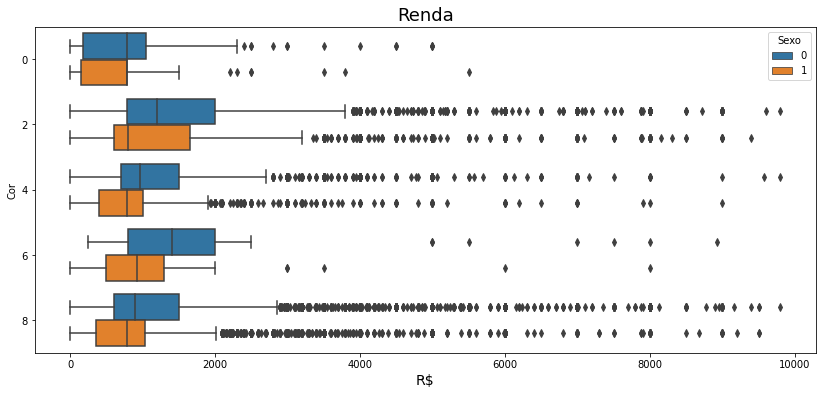

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue= 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14, 6)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Menor assimetria: sexo masculino, cor amarela

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats
ate_um_salario = stats.percentileofscore(dados.Renda, 788, kind='weak')
print('{0:.2f}%'.format(ate_um_salario))

43.86%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
dados.Renda.quantile(q=0.99, interpolation='higher')

10000

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
mean_renda_challenge = pd.crosstab(dados['Anos de Estudo'], dados.Sexo, aggfunc={'mean', 'median', 'max', 'std'}, values=dados.Renda)
mean_renda_challenge.rename(index = anos_de_estudo, columns = sexo, inplace = True)
mean_renda_challenge

max                  mean               \
Sexo                           Masculino Feminino    Masculino     Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano   30000.0   4000.0   639.634131   379.888249   
1 ano                            30000.0   2000.0   758.170667   395.868932   
2 anos                           15000.0   3000.0   750.346979   401.943396   
3 anos                           15000.0   2300.0   870.689600   438.583106   
4 anos                           12000.0   6000.0  1011.316995   552.040558   
5 anos                           15000.0   6000.0  1012.560484   613.722892   
6 anos                           20000.0   6000.0  1153.702101   752.227129   
7 anos                           15000.0   3000.0  1204.118510   671.360563   
8 anos                           30000.0  10000.0  1346.827097   773.133197   
9 anos                           30000.0   3000.0  1219.366242   687.278746   
10 anos                          45000.0   6000.0  1444.807584   765.260417   
11 anos                         200000.0  30000.0  1807.933865  1068.497080   
12 anos                          14000.0  20000.0  2097.304450  1401.944030   
13 anos                          18000.0  20000.0  2563.925676  1719.722543   
14 anos                          30000.0  20000.0  3186.119134  1877.397321   
15 anos ou mais                 100000.0  30000.0  5067.496679  3313.005402   
Não determinados                  4200.0   2000.0  1017.500000   636.871795   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     500.0    200.0   936.100170   476.214935  
1 ano                              600.0    300.0  1334.361755   366.591242  
2 anos                             620.0    300.0   975.953261   425.775808  
3 anos                             788.0    400.0   924.124902   361.617689  
4 anos                             788.0    500.0  1034.263297   521.330074  
5 anos                             800.0    600.0   947.743487   505.353383  
6 anos                             850.0    788.0  1282.628318   665.049645  
7 anos                             958.0    788.0  1087.764695   446.741896  
8 anos                            1000.0    788.0  1506.709225   726.725978  
9 anos                             900.0    788.0  1580.662436   468.609950  
10 anos                           1000.0    788.0  2114.821009   550.346484  
11 anos                           1200.0    800.0  3208.727447  1197.701709  
12 anos                           1500.0    980.0  1734.768866  1881.091696  
13 anos                           2000.0   1100.0  2199.535857  2171.024719  
14 anos                           2000.0   1300.0  3945.477815  2193.790734  
15 anos ou mais                   3500.0   2300.0  5676.517477  3397.387037  
Não determinados                   815.0    700.0   732.747874   464.567211

Não existe correlação entre tempo de estudo e o valor máximo da renda. Em média, a renda tende a aumentar quanto maior o tempo de estudo para homens, enquanto para mulheres não pode-se notar aumento entre 6 e 10 anos de estudo (renda fica estagnada).

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

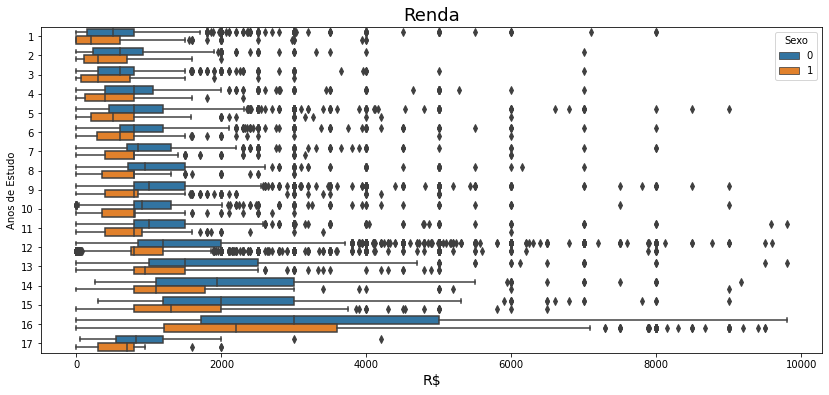

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue= 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14, 6)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
grouped_by_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
grouped_by_uf.rename(index = uf, inplace = True)
grouped_by_uf.sort_values(by=('Renda', 'std'), ascending=True, inplace = True)
grouped_by_uf

Renda                             
                            mean  median     max          std
UF                                                           
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Amazonas             1445.130100   900.0   22000  1757.935591
Ceará                1255.403692   789.0   25000  1821.963536
Maranhão             1019.432009   700.0   30000  1887.816905
Paraíba              1293.370487   788.0   30000  1950.272431
Amapá                1861.353516  1200.0   15580  2020.688632
Pará                 1399.076871   850.0   50000  2053.779555
Roraima              1783.588889  1000.0   20000  2079.659238
Acre                 1506.091782   900.0   30000  2276.233415
Piauí                1074.550784   750.0   40000  2373.355726
Pernambuco           1527.079319   900.0   50000  2389.622497
Rondônia             1789.761223  1200.0   50000  2406.161161
Tocantins            1771.094946  1000.0   60000  2934.590741
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2269.346264  1240.0  100000  3589.854983

O estado de Minas Gerais é aquele que possui maior desigualdade salarial (maior desvio médio). A menor desigualdade está em Alagoas. A renda mais alta da lista está na Bahia, segundo lugar em desigualdade.

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

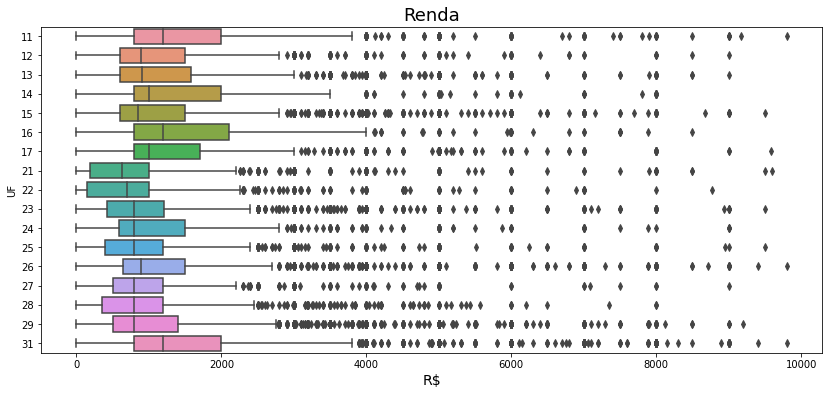

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14, 6)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Escreva suas conclusões aqui...